## PYTHON FOR SCRAPING APP STORE REVIEW

### Step 1 – Install and Setup Packages
First, you have to install and setup the necessary packages. In this step you will install the app_store_scraper using the Python package installer.

In [ ]:
pip install app_store_scraper    # Using Anaconda prompt

### Step 2 – Get App's Name and ID
I will be using a random app and I will be scraping its reviews for the sake of this demo. But if have a personal app that you built and you have it on app store, you can use that app with these same techniques. You just need to get the app's name and ID, which you can find by typing the name of the app into Google using your PC.

Example: "Slack app on apple app store"

You should click on the first result which will redirect you to the official Apple store. There you will find the "Slack app" and everything about it.

Once the page loads in the URL you will see the app name (Slack) and app ID (618783545). Copy it down in your notepad.

#### Now you'll need to import some packages and run some code:

In [1]:
import pandas as pd
import numpy as np
import json

import warnings
%matplotlib inline


In the code below, you will import the pandas library which helps you add evaluations/reviews to a dataframe. You'll also import the numpy library for data transformation and modification. Finally, you'll get the app_store_scraper package itself for scraping the reviews from the website.

You will have to create and instance of the Appstore class, then pass in the arguments country, app_name, and the app_id.

In [2]:
from app_store_scraper import AppStore
slack = AppStore(country='us', app_name='slack', app_id = '618783545')

slack.review(how_many=2000)

2023-03-04 20:21:17,693 [INFO] Base - Initialised: AppStore('us', 'slack', 618783545)
2023-03-04 20:21:17,708 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/slack/id618783545
2023-03-04 20:21:22,995 [INFO] Base - [id:618783545] Fetched 120 reviews (120 fetched in total)
2023-03-04 20:21:29,032 [INFO] Base - [id:618783545] Fetched 260 reviews (260 fetched in total)
2023-03-04 20:21:35,152 [INFO] Base - [id:618783545] Fetched 420 reviews (420 fetched in total)
2023-03-04 20:21:41,069 [INFO] Base - [id:618783545] Fetched 560 reviews (560 fetched in total)
2023-03-04 20:21:47,451 [INFO] Base - [id:618783545] Fetched 700 reviews (700 fetched in total)
2023-03-04 20:21:54,582 [INFO] Base - [id:618783545] Fetched 840 reviews (840 fetched in total)
2023-03-04 20:22:00,515 [INFO] Base - [id:618783545] Fetched 980 reviews (980 fetched in total)
2023-03-04 20:22:06,695 [INFO] Base - [id:618783545] Fetched 1120 reviews (1120 fetched in total)
2023-03-04 20:22:12,996 [INFO

The reviews are all stored in the slack variable, so run the command below to see the reviews stored in JSON format.

In [3]:
slack.reviews

[{'date': datetime.datetime(2021, 11, 19, 15, 37, 47),
  'developerResponse': {'id': 26382584,
   'body': "Hey there, thank you for the helpful feedback! We're sorry to hear you're having a tough time with notifications. Could you please write to us at feedback@slack.com? We may be able to investigate the issue for you and help!",
   'modified': '2021-11-20T23:14:05Z'},
  'review': 'The app is easy to learn and has become an integral part of our small business. \nI wish I could put the channels in the order we use them the most, instead of the app just putting them where it wants. \nI had an issue with posting pics and tech help was friendly and got back with me quickly. The problem was resolved in a week or so. \nMy biggest complaint is the app is bad about not giving notifications when it should. This is a real problem as many employees will not check the app unless it notifies them something has been posted. Every time there is an update, the notifications seem to work well for a fe

### Step 3 – Convert Data from JSON
To make data more readable and properly formatted, you need to convert it from JSON format to a Pandas dataframe. You can do that with the following code:

In [4]:
slackdf = pd.DataFrame(np.array(slack.reviews),columns=['review'])
slackdf2 = slackdf.join(pd.DataFrame(slackdf.pop('review').tolist()))
slackdf2.head()

date                                  developerResponse  \
0 2021-11-19 15:37:47  {'id': 26382584, 'body': 'Hey there, thank you...   
1 2022-04-14 14:50:10                                                NaN   
2 2022-10-31 09:26:51  {'id': 32912428, 'body': 'Thanks for your feed...   
3 2021-06-16 23:48:53                                                NaN   
4 2022-08-05 01:50:27  {'id': 31278707, 'body': 'Hi there, We’d be in...   

                                              review  rating  isEdited  \
0  The app is easy to learn and has become an int...       4     False   
1  The recent iPad App update misses the mark qui...       2     False   
2  When resizing the window of Slack, the changes...       3     False   
3  I love slack. I started using slack in January...       5     False   
4  Post-acquisition the Slack iOS app has taken s...       2      True   

                   userName                                      title  
0               Hippiegal23              A few months in. Mostly good.  
1                 RufHaus71  One Step Forward, Two Steps Back for iPad  
2                    dacloo          Does not work well with iPadOS 16  
3              AnC.Really?!                   Workplace Communications  
4  Just Your Usual Reviewer                    Getting worse and worse

### Step 4 – Convert the Dataframe to CSV
Here is the final step: you will covert the dataframe into csv (comma-separated value) format so that you can have it on your local machine. Then you can view it in a spreadsheet and also share it with a colleague.

In [5]:
slackdf2.to_csv('Slack-app-reviews.csv')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

data = pd.read_csv("Slack-app-reviews.csv")
print(data.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


   Unnamed: 0              date  \
0           0  11/19/2021 15:37   
1           1   4/14/2022 14:50   
2           2   10/31/2022 9:26   
3           3   6/16/2021 23:48   
4           4     8/5/2022 1:50   

                                   developerResponse  \
0  {'id': 26382584, 'body': "Hey there, thank you...   
1                                                NaN   
2  {'id': 32912428, 'body': "Thanks for your feed...   
3                                                NaN   
4  {'id': 31278707, 'body': 'Hi there, We’d be in...   

                                              review  rating  isEdited  \
0  The app is easy to learn and has become an int...       4     False   
1  The recent iPad App update misses the mark qui...       2     False   
2  When resizing the window of Slack, the changes...       3     False   
3  I love slack. I started using slack in January...       5     False   
4  Post-acquisition the Slack iOS app has taken s...       2      True   

       

[nltk_data]   Unzipping corpora\stopwords.zip.


To analyze Slack App Reviews, we only need two columns, review and rating; So let’s create a new dataset with just these two columns and take a step further with Slack App reviews sentiment analysis

In [3]:
data = data[["review", "rating"]]
print(data.head())

                                              review  rating
0  The app is easy to learn and has become an int...       4
1  The recent iPad App update misses the mark qui...       2
2  When resizing the window of Slack, the changes...       3
3  I love slack. I started using slack in January...       5
4  Post-acquisition the Slack iOS app has taken s...       2


Now let’s see whether any of these two columns contain any null values
If there are null values in the content column, we will drop the null values using the code **data = data.dropna()** and move further 

In [4]:
print(data.isnull().sum()) # No null values

review    0
rating    0
dtype: int64


Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the review column

In [5]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

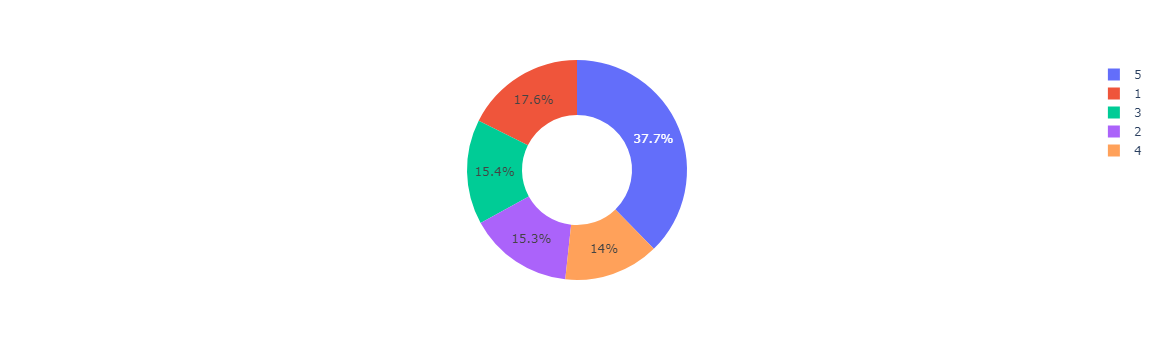

In [6]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

You can see that 37.7% of the users have given five ratings to Slack App, and 17.6% of the users have rated it with 1. Now let’s have a look at the kind of words the users use in the reviews of Slack App

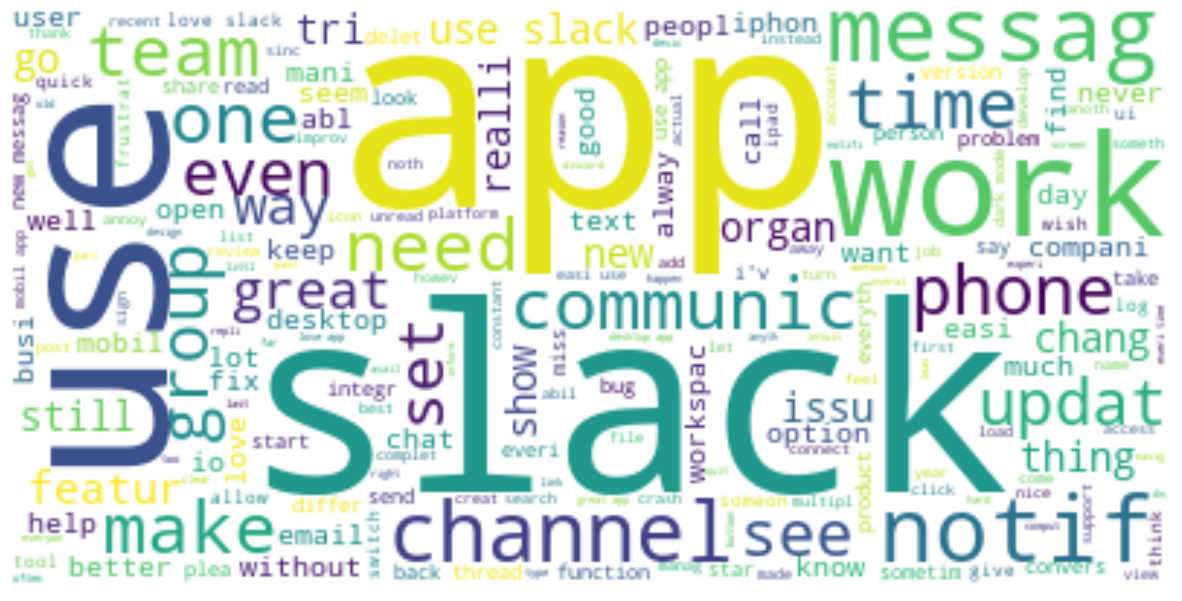

In [15]:
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the Slack App

In [16]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


                                              review  Positive  Negative  \
0  app easi learn becom integr part small busi wi...     0.146     0.162   
1  recent ipad app updat miss mark quit consider ...     0.032     0.105   
2  resiz window slack chang edit post lost press ...     0.186     0.074   
3  love slack start use slack januari job communi...     0.278     0.029   
4  postacquisit slack io app taken someth nosed q...     0.104     0.119   

   Neutral  
0    0.693  
1    0.863  
2    0.740  
3    0.693  
4    0.778  


Now let’s have a look at the kind of words people use in the positive reviews of Slack App

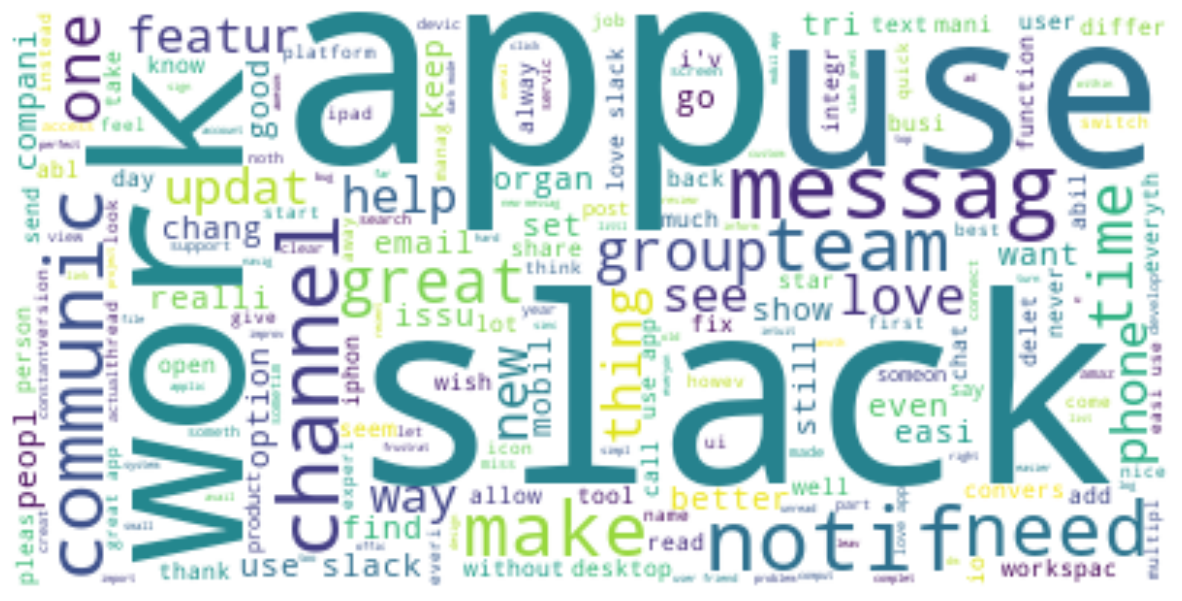

In [17]:
positive =' '.join([i for i in data['review'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s have a look at the kind of words people often use in the negative reviews of Slack App

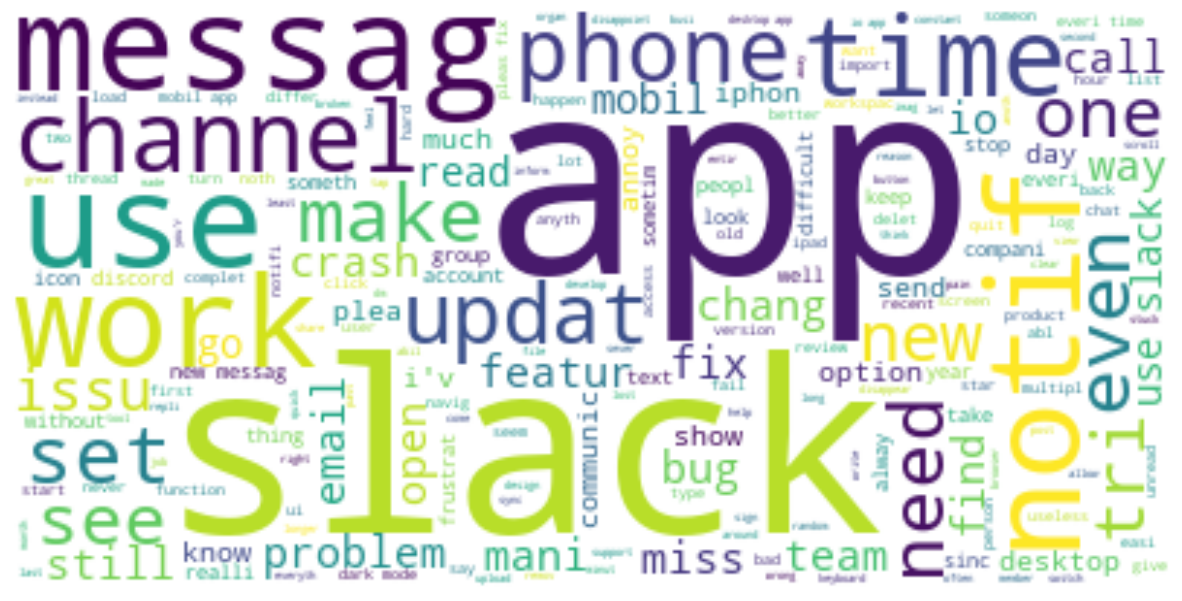

In [18]:
negative =' '.join([i for i in data['review'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

So this is how we can analyze the sentiments of Slack App Reviews using the Python programming language

Conclusion
Finally, you should have your "Slack-app-reviews.csv" file saved into your project folder and you're ready to go.
In this short article, you were able to scrape Slack app store reviews into a dataframe and then save it into your local machine using 4 easy steps. I hope you enjoyed it, cheers.

### Link to the main code

https://www.freecodecamp.org/news/how-to-use-python-to-scrape-app-store-reviews/